In [1]:
from nav_sim_modules.actioner import HeuristicAutonomousActioner
from nav_sim_modules.scener import ChestSearchRoomScener

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)

scene = ChestSearchRoomScener()
scene.generate_scene()

robot = HeuristicAutonomousActioner(allowable_angle = np.pi/8, avoidance_size=1, path_exploration_count=20)
pose = scene.spawn()
robot.initialize(env_pixel=scene.env_pixel, global_pose=pose)

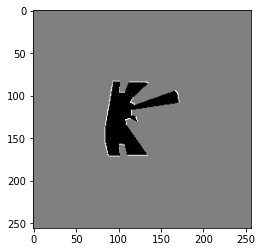

In [2]:
occ = np.copy(robot.occupancy_map)
occ[occ==-1] = 50
plt.imshow(occ, cmap='gray')

In [3]:
before = np.copy(robot.pose)
before

array([-0.83392847, -2.97093488,  0.52623605])

In [4]:
robot.do_action_visualize([before[0]+1, before[1]+3.6, before[2]])
# robot.do_action_visualize([before[0]+0.0, before[1]+5.0, before[2]])

start: (119, 98, 0.5262360484548386), goal: (129, 134, 0.5262360484548386)


In [5]:
after = np.copy(robot.pose)
after

array([0.1       , 0.6       , 0.52623605])

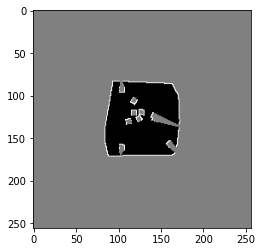

In [6]:
occ2 = np.copy(robot.occupancy_map)
occ2[occ2==-1] = 50
plt.imshow(occ2, cmap='gray')

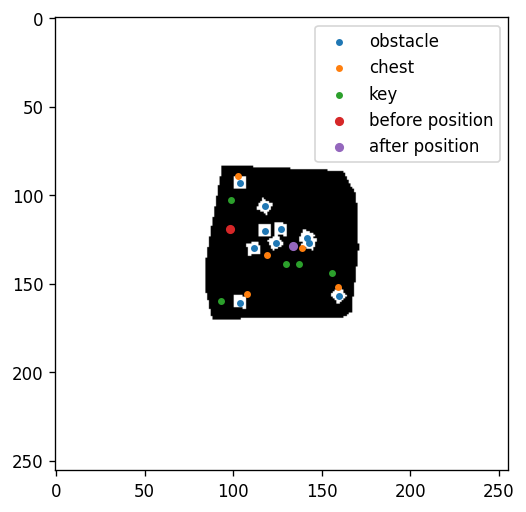

In [7]:
occ3 = np.copy(scene.env_pixel)
occ3[occ3==-1] = 50

plt.figure(figsize=(5,5), dpi=120)

obs = scene.components_info['obstacle']
che = scene.components_info['chest']
key = scene.components_info['key']

plt.imshow(occ3, cmap='gray')

obs_xy = np.array([robot.navs.con2pix(o) for o in obs])
che_xy = np.array([robot.navs.con2pix(c) for c in che])
key_xy = np.array([robot.navs.con2pix(k) for k in key])
before_xy = robot.con2pix(before)
after_xy = robot.con2pix(after)

plt.scatter(obs_xy[:,1], obs_xy[:,0], s=10)
plt.scatter(che_xy[:,1], che_xy[:,0], s=10)
plt.scatter(key_xy[:,1], key_xy[:,0], s=10)
plt.scatter(before_xy[1], before_xy[0], s=20)
plt.scatter(after_xy[1], after_xy[0], s=20)
plt.legend(["obstacle", "chest", "key", "before position", "after position"])